# Least square approximations/ Approximation of data involving least square fitting

by [Richard Tsai](https://www.researchgate.net/profile/Richard_Tsai3)


## A motivating example: linear regression

Data set: $(x_j,y_j), j=1,2,\cdots,n$

(LSQ) Find a line $g(x)=a_0+a_1x$ which best fit the data:

$$ \min_{a0, a1} \sum_{j=0}^n | a_0+a_1x_j -y_j |^2 $$

$E(a_0,a_1):=\sum_{j=0}^n | a_0+a_1x_j -y_j |^2$ is a quadratic function.

(LSQ) $\iff$ find the minimum of $E$ $\iff$ find the critical point of $E$

$$\partial E/\partial a_0 =0, \partial E/\partial a_1=0 $$

$$\iff \sum_{j=0}^n a_0+a_1x_j -y_j =0, \sum_{j=0}^n (a_0+a_1x_j -y_j)x_j =0$$

Notice that the two equations above depend linearly on the unknown $a_0$ and $a_1$.
You can write them in conveniently in the matrix-vector form.


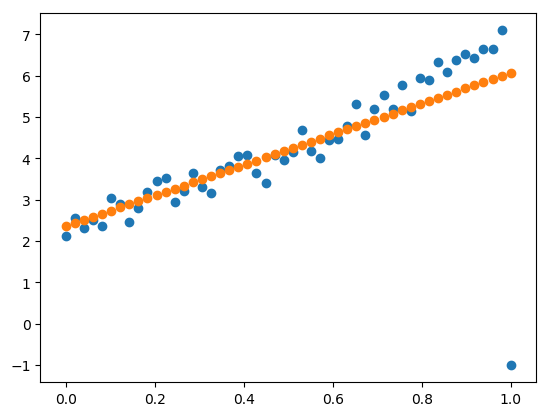

PyObject <matplotlib.collections.PathCollection object at 0x12e67da50>

In [1]:
f=x-> 2.5.*x.^2+2.*x+2+rand()

x=linspace(0,1,50)

y=f.(x)

#introduce here an outlier
y[end]=-1.0

using PyPlot

scatter(x,y)

# g(x)=a+bx, find a and b that best fits the data (x_j, y_j), j=1,2,...


#similar to the set up in the interpolation:

A=[ ones(length(x)) x]

B=A'*A
c=A'*y

a=B\c

scatter(x, A*a)

In [28]:
cond(A'A)

18.54752502692956

## General description of least square approximation problems

**The least square problem**: let $f(x):=\frac{1}{2}||Ax-b||_2^2$. We want to find where $f$ achieves the minimal value.

### Algebraic view
$$||Ax-b||_2^2 = (Ax-b,Ax-b)=(Ax-b)^T(Ax-b) = (x^T A^T -b^T)(Ax-b)$$
$$ = x^TA^TAx - x^TA^Tb - b^TAx+b^T b$$

(Note that $x^TA^Tb = (b^TAx)^T = b^TAx$ is a scalar.)

Critical point of $f$ satisfies:

$$ f^\prime(x) = A^TA x - A^T b = 0. $$

Solving the least square problem is equivalent to solving the **normal equation**

$$A^TAx=A^Tb.$$

** $A^TA$ is symmetric, positive definite **

### Geometrical view of the least square problem

* $y:=Ax$ is a vector in $col(A)$, the column space of $A$.


* $b=b^*+b^\perp,$ where $b^*$ in $col(A)$ and $b^\perp$ is not.
   
   
* $Ax=b^*$ has a unique solution, *if the columns of $A$ are linearly independent*.


* (LSQ) is equivalent to find $b^\perp$ that is the smallest 2-norm.


* The right $b^\perp$ is the one which is perpendicular to *all* vectors in $col(A)$.



**Learning objectives**:

* Where does $A$ come from? 
    * In particular, how do *orthogonal polynomials* come into play?
    
* Given $A$ and $m\times n$ matrix, the typical numerical methods to solve the least square problems:
    * (Cholesky) or using the backslash operator to solve the normal equation directly, QR and SVD
    * Know how to use the "truncated" QR and SVD to improve the condition of the least square approximation.
    * Know which method is more suitable than the others
    * Know for to use the existing code to solve least square problems

* Know the geometry of least square problems.

#### Noticed that the normal equation of a rank-difficient matrix is not invertible

So more elaborate methods, such as truncated QR and truncated SVD are needed. See the following discussion

In [21]:
D=rand(8,4)
D[:,2]=copy(D[:,1])

cond(D'D)

1.5518221009430436e16

## Orthogonal polynomials

Let $q(x)=c_1\phi_1(x)+c_2\phi_2(x)+\cdots+c_n\phi_n(x).$

We would like to use $q(x)$ to **approximate the given data**: $(x_1, y_1),(x_2,y_2),\cdots, (x_m,y_m), $ and **make prediction** at an arbitrarily chosen $x$.

* In general, $m\ge n$.

Least square approximation problem: 

**Find the coefficients $c_1,c_2,\cdots,c_n$ such that $q(x_j)$ *best fit* $y_j$, $j=1,2,\cdots,m$, in l2 norm:** 


* To fit the data, $(x_j,y_j)\in\mathbb{R}^2$, by a straight line, we simply choose $\phi_1(x)=1$ and $\phi_2(x)=x$.

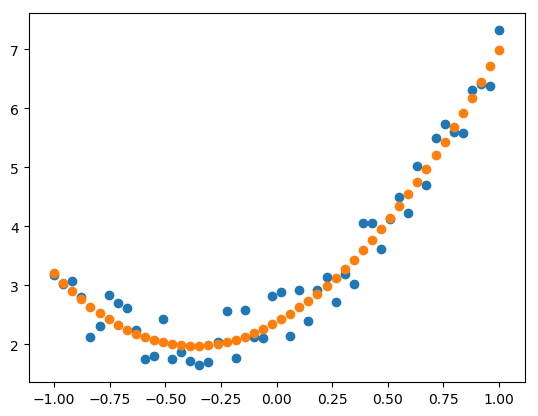

PyObject <matplotlib.collections.PathCollection object at 0x138c62910>

In [10]:
f=x-> 2.5.*x.^2+2.*x+2+rand()

x=linspace(-1,1,50)

n=length(x)
x_=collect(x)

A_=[ones(n) x_ x_.^2 x_.^3]

#Legendre polynomial as basis functions
A__=[ones(n) x_ 0.5*(3.*x_.^2-1.0) 0.5.*(5x_.^3-3.0x_)]

y_=f.(x_)
#y_[n-1]=1.2
#y_[n-2]=5.0

B=A_'*A_
c=A_'*y_

a=B\c

scatter(x_,y_)
scatter(x_, A_*a)

In [30]:
println("(x^2,x^3)=", dot(x.^2, x.^3))
println("(L2,L3)=", dot(0.5*(3.*x_.^2-1.0),0.5.*(5x_.^3-3.0x_)))


println("condition number using 1, x, x^2 x^3:             ", cond(A_'A_))
println("condition number using Legendre polynomials:      ", cond(A__'A__))

#if one uses QR factorization, one only needs to invert R
Q,R=qr(A_)
println("\ncondition number for R, after computing qr(A_ ):  ",cond(R))
Q,R=qr(A__)
println("condition number for R, after computing qr(A__):  ",cond(R))


(x^2,x^3)=8.675169359705565
(L2,L3)=3.3306690738754696e-16
condition number using 1, x, x^2 x^3:             62.23091391105069
condition number using Legendre polynomials:      6.281152904350122

condition number for R, after computing qr(A_ ):  7.888657294562296
condition number for R, after computing qr(A__):  2.506222836132119


## QR factorization

QR factorization finds orthonormal basis of the subspace spanned **successively** by columns of $A$.

$A=QR$ where the columns of $Q$ are orthonormal and $R$ is an upper triangular matrix.

Let $A$ be an $m\times n$ matrix and $m>n$.
There are two versions of QR factorization: the full QR or the "thin" QR.

* In this note, we shall assume the "thin" QR as default: $Q$ is an $m\times n$ orthonormal matrix, and $R$ is $n\times n$.

Let $a_j$ be the jth column of $A$ and $q_j$ be the jth column of $Q$.

**Very important property of $Q$**: span$\{a_1,\cdots,a_j\}=$span$\{q_1,\cdots,q_j\}, j=1,2,\cdots,n$


* Full QR factorization can be thought of  a QR factorization of $A_f$ which is an $m\times m$ matrix, by padding $A$ with the addition of $m-n$ zero column vectors.
    * $Q$ is a $m\times m$ orthonormal matrix


In [1]:
A=rand(4,2)
display(A)

Q,R=qr(A)
display(Q)
display(R)

Q'Q

4×2 Array{Float64,2}:
 0.710726  0.260087
 0.659208  0.095578
 0.249536  0.401383
 0.445615  0.636766

4×2 Array{Float64,2}:
 -0.648658  -0.204324
 -0.60164   -0.450742
 -0.227744   0.484354
 -0.4067     0.721446

2×2 Array{Float64,2}:
 -1.09569  -0.576596
  0.0       0.557581

2×2 Array{Float64,2}:
 1.0          1.14438e-16
 1.14438e-16  1.0        

In [2]:
Qf, Rf= qr(A, thin=false)
display(Qf)
display(Rf)

Qf'Qf

4×4 Array{Float64,2}:
 -0.648658  -0.204324  -0.375731  -0.62954 
 -0.60164   -0.450742   0.375465   0.542114
 -0.227744   0.484354   0.757179  -0.374451
 -0.4067     0.721446  -0.380174   0.411799

2×2 Array{Float64,2}:
 -1.09569  -0.576596
  0.0       0.557581

4×4 Array{Float64,2}:
 1.0          1.14438e-16   1.03458e-16   1.90986e-16
 1.14438e-16  1.0           8.2835e-17    1.39189e-16
 1.03458e-16  8.2835e-17    1.0          -2.94983e-17
 1.90986e-16  1.39189e-16  -2.94983e-17   1.0        

### Use QR factorization to solve the least square problems:

$A=QR$ 

1. Project the data vector: $y: = Q^\top b$
2. Solve $Rx=y$.

Let's see if this solution satisfies the normal equation.

Since $Q$ is an orthonormal matrix (it's columns are orthonormal), so 
* $Q^\top Q=I$.
* $QQ^\top$ is a **projection matrix**: $z=QQ^\top b$ is a vector **in the column space of $Q$**, which is the same as the column space of $A$. Oberve 
    $$Q^\top b=\left(\begin{array}{c}
(q_1,b)\\
(q_2,b)\\
\cdots\\
(q_n,b)\\
\end{array}\right)\implies QQ^\top = Q\left(\begin{array}{c}
(q_1,b)\\
(q_2,b)\\
\cdots\\
(q_n,b)\\
\end{array}\right)= (q_1,b)q_1 + (q_2,b)q_2 + \cdots + (q_n,b)q_n$$
    * So $z=QQ^\top b$ is in the range of $A$; i.e. $Ax=z$ has a unique solution if the columns of $A$ are linearly independent.

We can prove our QR algorithm either by geometrical arguments or algebraically.

#### Algebraic view

$$A^\top=R^\top Q^\top,$$

$$ Rx=Q^\top b \implies QRx=QQ^\top b \implies (R^\top Q^\top) QR x = (R^\top Q^\top) QQ^\top b$$

$$ Q^\top Q=I \implies A^\top A x = R^\top Q^\top b=A^\top b$$

#### Geometric view

$Q^\top b=\left( q_1\cdot b, q_2\cdot b, \cdots, q_n\cdot b \right)^\top$ is the orthogonal projection of $b$ to $col(A)$, represented in the "new" coordinate systems defined by the columns of $Q$.


## Pivoted QR factorization and truncation and applications

QR-factorization can be used to solve both **underdetermined**, 
**square** and **overdetermined**
linear systems of equations. 

It can also be used to compute a numerically 
stable solution of an **ill-conditioned** system.


With pivoted QR-factorization a matrix can be factorized into
$$AP=QR$$
where $P$ is a permutation matrix, making the diagonal elements $r_{i,i}$ in 
the uppertriangular matrix $R$ be ordered in decending order, i.e.
$\vert r_{i,i} \vert \le \vert r_{i-1,i-1} \vert $. 

$Q$ is orthonormal, i.e. $Q^\top Q = I$. Assume the matrix $A$ is $n\times n$. 

In Julia, $Q,R,$ and $P$ can be computed as follows:

```
F=qrfact(A, Val{true}) #Val{true} tells Julia to compute the pivoted full QR factorizaton
Q=F[:Q]
R=F[:R]
P=F[:P]
```

The solution of a linear system of equations $A{\bf x}={\bf b}$ is obtained from 
$$R{\bf y}=Q^T{\bf b}, \quad and \quad {\bf x}=P{\bf y}$$
If the matrix $A$ is ill-conditioned $R$ can be written on block form
$$R=\pmatrix{R_{11}&R_{12}\cr
               0   &E\cr}$$
where 
* $R_{11}$ is an uppertriangular matrices of dimension $r\times r$, 
* $E$ is an uppertriangular matrices of dimension $n-r\times n-r$, and **the elements of 
$E$ are very small**. 
    - The smaller the elements of $E$ are the more 
ill-conditioned is the matrix $A$. 
    - If the elements of $E$ are exactly zero the matrix $A$ is rank-deficient with $rank(A)=r$.
        
By setting small but nonzero elements in $E$ to zero we regard the matrix $A$ 
as rank-deficient even if it isn't that mathematically. Then we cannot 
find a unique solution. But we can, instead, **find a  least square solution with the smallest 2-norm** (why?) to
$\hat A \hat{\bf x} = {\bf b}$, where
$$\hat A = Q \pmatrix{R_{11}&R_{12}\cr
                         0  & 0 \cr} P^T$$
according to the following algorithm:

1. Compute the vectors $\hat {\bf d}$ and ${\bf d}_E$ from
$$Q^T {\bf b} =\pmatrix{\hat {\bf d}\cr
                         {\bf d}_E \cr}$$
2. Solve the system 
$$R_{11}\hat {\bf y}=\hat {\bf d}$$
3. Finally compute
$$\hat {\bf x}=P\pmatrix{\hat {\bf y}\cr
                            0\cr}$$



The goal of this exercise is to illustrate the following relations:

1. the sensitivity of the solution $\hat {\bf x}$  from the experimentally computed condition number of $R_{11}$ (see below) as a
function of $r$
2. the condition number of $R_{11}$ computed with Julia's function 'cond( )' as a function of $r$
3. the norm of the matrix $E$ as a function of $r$
4. the norm of the residual ${\bf res}=A \hat {\bf x} - {\bf b}$ as a 
function of $r$

What is important in practice is to find the rank $r$ for
which both the residual ${\bf res}$ and the sensitivity of disturbancies in
**b** are "small". Often this is a compromize; the norm of the residual
increases while the sensitivity (condition number) decreases as the rank $r$
decreases.  

In the following box, a function named 'gen_illposed_system()' is defined. 
It creates an ill-conditioned system $A{\bf x}={\bf b}$.

1. Compute a system of size $n=18$, i.e. $A$ is $18\times 18$ and ${\bf b}$ is
$18\times 1$. 
2. Estimate the condition number $\kappa (A)$ experimentally
from the relation
$${\Vert \Delta {\bf x} \Vert_2 \over \Vert {\bf x} \Vert_2} = 
\kappa (A) {\Vert \Delta b \Vert_2 \over \Vert {\bf  b} \Vert_2}$$
by disturbing ${\bf b}$ with some small perturbances $\Delta {\bf b}$ and see
how ${\bf x}$ is changed, $\Delta {\bf x}$. Compare your result with 
Julia's function `cond()`.
3. Write a program showing a table of the following quantities 
as functions of the rank $r=8,7,6,5$: $\tt norm(E)$, $\tt cond(R_{11})$,
the experimentally computed condition number of $R_{11}$, $\tt norm(x)$,
and $\tt norm(res)$. Express your results in a way that describes the 
behaviour of the relations mentioned above as functions of the rank $r$.



In [2]:
function gen_illposed_system(n)
# ILLPOSED Creates an ill-posed system Ax=b.
#    ILLPOSED(N) creates an ill-posed system of size N.
#    N >= 2
    
    r = max(convert(Int,round(0.25*n)),2)
    U,S,V = svd(rand(n,n))
    S[n-r+1:n]=linspace(1.5e-9,2.45e-12,r)
    A = U*diagm(S)*V'
    b = A*rand(n,1)
    
    return A,b
end

function gen_difficient_system(n)
# ILLPOSED Creates an ill-posed system Ax=b.
#    ILLPOSED(N) creates an ill-posed system of size N.
#    N >= 2
    
    r = max(convert(Int,round(0.25*n)),2)
    U,S,V = svd(rand(n,n))
    S[n-r+1:n]=zeros(r) #linspace(1.5e-9,2.45e-12,r)
    A = U*diagm(S)*V'
    b = A*rand(n,1)
    
    return A,b
end

gen_difficient_system (generic function with 1 method)

In [23]:
A,b=gen_difficient_system(8)
B,c=gen_illposed_system(8)
C=rand(8,8)

println(cond(A))
println(cond(B))
println(cond(C))

1.8806043398671156e16
1.6266982594353767e12
39.051587950468544


In [4]:
A,b=gen_illposed_system(8)

cond(A)

F=qrfact(A, Val{true})

A*F[:P]-F[:Q]*F[:R]

8×8 Array{Float64,2}:
  0.0           0.0          3.10516e-16  …  -1.94289e-16   0.0        
  0.0          -5.55112e-17  1.11022e-16      4.16334e-17   2.22045e-16
  0.0           0.0          1.11022e-16     -1.11022e-16   0.0        
  0.0           0.0          0.0              1.11022e-16  -5.55112e-17
 -1.11022e-16  -8.32667e-17  1.11022e-16      0.0           0.0        
  0.0           0.0          0.0          …  -1.11022e-16   0.0        
  0.0          -5.55112e-17  5.55112e-17     -1.11022e-16   1.11022e-16
 -5.55112e-17   0.0          1.11022e-16     -1.11022e-16   0.0        

In [5]:
A,b=gen_illposed_system(18)

F=qrfact(A, Val{true})

Q=F[:Q]
R=F[:R]
P=F[:P]

n=length(b)

for r=4:18
    R11=R[1:r,1:r]

    E=R[r+1:n,r+1:n]

    d=Q'*b

    dhat=d[1:r]
    dE=d[r+1:n]

    yhat=R11\dhat
    x=P*[yhat;zeros(n-r)]
    
    println(x-)
    
    #display(R)
    #display(E)
    
    @printf "r=%2d, cond(R11)=%15d, norm(E)=%5.15f, res=%5.15f\n" r cond(R11) norm(E) norm(A*x-b)
    
end

r= 4, cond(R11)=              4, norm(E)=2.107940247736643, res=3.265439035753067
r= 5, cond(R11)=              5, norm(E)=1.819124563223740, res=2.098356841788691
r= 6, cond(R11)=              5, norm(E)=1.742291908374359, res=1.318182505319975
r= 7, cond(R11)=              6, norm(E)=1.433808658045680, res=1.300341618284477
r= 8, cond(R11)=              7, norm(E)=1.333641317527919, res=1.298976821490687
r= 9, cond(R11)=              9, norm(E)=1.333376191665098, res=1.106278196424944
r=10, cond(R11)=             10, norm(E)=1.206693955418061, res=0.751994761993389
r=11, cond(R11)=             12, norm(E)=1.029451211317090, res=0.734402185240326
r=12, cond(R11)=             14, norm(E)=0.941082464837174, res=0.726514049652165
r=13, cond(R11)=             16, norm(E)=0.785616505731822, res=0.509636518725187
r=14, cond(R11)=             17, norm(E)=0.000000002646341, res=0.000000001132107
r=15, cond(R11)=     7369804610, norm(E)=0.000000002160661, res=0.000000000563440
r=16, cond(R11)=

### Solving least square problems with QR factorization

The least squares method is used to fit functions to measured data. In the
following box, measurements of the $CO_2$-concentration in the athmosphere is
tabulated. 
The concentration is measured in parts per million and is
available for each month from 1980 to 2003. 
The data are tabulated following teh following format:

1980 338.01 338.36 340.08  ........................ 338.21

1981 339.23 340.47 341.38  ........................ 339.61

Hence each row starts with the year, then follows the 12 measurements for
each month. 

Pick out the monthly values (columns 2 to 13) and store them columnwise in Q

```
Q=maunaloa[:,2:13]'```

Put the measurements  in time increasing order in one column

```
b=Q[:] 
using PyPlot
plot(b,"x")```

In [276]:
maunaloa=
[1980 338.01 338.36 340.08 340.77 341.46 341.17 339.56 337.60 335.88 336.01 337.10 338.21;  
1981 339.23 340.47 341.38 342.51 342.91 342.25 340.49 338.43 336.69 336.85 338.36 339.61;
1982 340.75 341.61 342.70 343.56 344.13 343.35 342.06 339.82 337.97 337.86 339.26 340.49; 
1983 341.37 342.52 343.10 344.94 345.75 345.32 343.99 342.39 339.86 339.99 341.16 342.99;
1984 343.70 344.51 345.28 347.08 347.43 346.79 345.40 343.28 341.07 341.35 342.98 344.22;
1985 344.97 346.00 347.43 348.35 348.93 348.25 346.56 344.69 343.09 342.80 344.24 345.56;
1986 346.29 346.96 347.86 349.55 350.21 349.54 347.94 345.91 344.86 344.17 345.66 346.90;
1987 348.02 348.47 349.42 350.99 351.84 351.25 349.52 348.10 346.44 346.36 347.81 348.96; 
1988 350.43 351.72 352.22 353.59 354.22 353.79 352.39 350.44 348.72 348.88 350.07 351.34;
1989 352.76 353.07 353.68 355.42 355.67 355.13 353.90 351.67 349.80 349.99 351.30 352.53;
1990 353.66 354.70 355.39 356.20 357.16 356.22 354.82 352.91 350.96 351.18 352.83 354.21;
1991 354.72 355.75 357.16 358.60 359.34 358.24 356.17 354.03 352.16 352.21 353.75 354.99;
1992 355.98 356.72 357.81 359.15 359.66 359.25 357.03 355.00 353.01 353.31 354.16 355.40;
1993 356.70 357.16 358.38 359.46 360.28 359.60 357.57 355.52 353.70 353.98 355.33 356.80;
1994 358.36 358.91 359.97 361.26 361.68 360.95 359.55 357.49 355.84 355.99 357.58 359.04; 
1995 359.96 361.00 361.64 363.45 363.79 363.26 361.90 359.46 358.06 357.75 359.56 360.70;
1996 362.05 363.25 364.03 364.72 365.41 364.97 363.65 361.49 359.46 359.60 360.76 362.33;
1997 363.18 364.00 364.57 366.35 366.79 365.62 364.47 362.51 360.19 360.77 362.43 364.28;
1998 365.32 366.15 367.31 368.61 369.29 368.87 367.64 365.77 363.90 364.23 365.46 366.97;
1999 368.15 368.87 369.59 371.14 371.00 370.35 369.27 366.94 364.63 365.12 366.67 368.01;
2000 369.14 369.46 370.52 371.66 371.82 371.70 370.12 368.12 366.62 366.73 368.29 369.53;
2001 370.28 371.50 372.12 372.87 374.02 373.30 371.62 369.55 367.96 368.09 369.68 371.24;
2002 372.43 373.09 373.52 374.86 375.55 375.41 374.02 371.49 370.71 370.25 372.08 373.78;
2003 374.68 375.63 376.11 377.65 378.35 378.13 376.62 374.50 372.99 373.00 374.35 375.70];

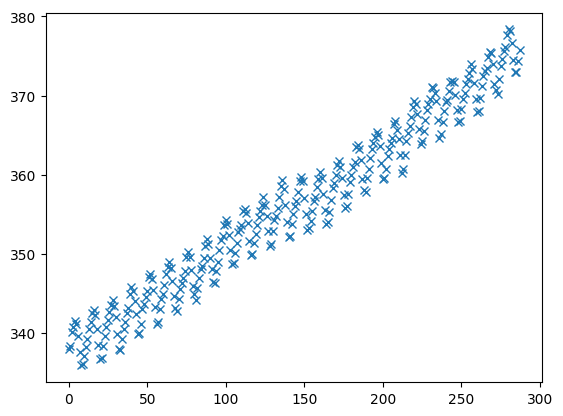

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x137d6fe10>

In [277]:
Q=maunaloa[:,2:13]'

b=Q[:] 

using PyPlot

plot(b,"x")

We observe that the data seems quite oscillatory.
A suitable function to fit to the given data could be
$$y(t)=c_1+c_2e^{\alpha t} + \sum_{k=1}^{np} \left(a_k cos({2\pi kt\over 12}) +
b_k sin({2\pi kt\over 12})\right)$$
where $t$ is in months, $\alpha = 0.00037$. 
**The other parameters to be computed with the least squares method.** 

1. Solve the least square problem for $np=1,2,...,12$ by solving directly the normal equation with the backlash operator. This means `x=(A'A)\(A'b)`. Report also $cond(A'A)$.

2. Use the function `qrfact()` to solve the least squares problem for $np=1,2,\cdots,12$, truncating $A$ to rank $r$, for $r=1,2,\cdots,14$. This means, following the notation in teh previous discussion, $R_{11}$ is is an $r\times r$ matrix . Report also $cond(R_{11})$.

3. Present the computed values of the parameters in each case. Plot out the solutions $y(t)$ against the data points.
Compare your numerical solutions computed in 1. and in 2. Try to explain the discrepancies that you observe.

4. Compute also the residual and write out its 2-norm in each case. Did the residual always decrease as $np$ increases?

5. Perturb the data by a small amount: ` b.+=1e-5*rand(size(b))`, and compare your least square solutions with the ones that you computed without the perturbation. 


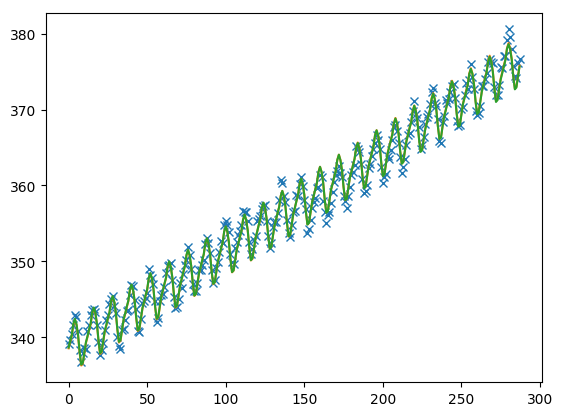

number of basis fns=18, rank=12, residual = 13.337487
cond(A'A)=272325806629854496, cond(R_{11})=1.493297
||x-x_||=516150550135.979065
||y-y_||=1.191771



In [291]:
b.+=1e-5*rand(size(b))

m=length(b)
α=0.00037

t=collect(1:m)

y =zeros(m)
y_=zeros(m)

for np=8:8
    
   r=min(2+2np, 12)
       
   A=zeros(m,2+2np) 
   n=size(A,2)

   A[:,1]=ones(m)
   A[:,2]=exp.(α.*t)
   
   for k=1:np
     A[:,2+2k-1]=cos.(2π*k.*t/12.0)
     A[:,2+2k  ]=sin.(2π*k.*t/12.0)
   end

   F=qrfact(A, Val{true})

   Q=F[:Q]
   R=F[:R]
   P=F[:P]
    
   c=A'*b
   
   #replace the following line by using qr factorization
   x_=(A'A)\c
   
   #standard QR solution
   #x=R\Q'*b 
    
   R11=R[1:r,1:r]

   E=R[r+1:n,r+1:n]

   d=Q'*b

   dhat=d[1:r]
   dE=d[r+1:m]

   yhat=R11\dhat
   x=P*[yhat;zeros(n-r)] 
       
   #display(x-x_)
    
   y=x[1]*ones(m)+x[2]*exp.(α.*t)
   for k=1:np
            y.+=x[2+2k-1]*cos.(2π*k.*t/12.0)
            y.+=x[2+2k  ]*sin.(2π*k.*t/12.0)
   end
    
   y_=x_[1]*ones(m)+x_[2]*exp.(α.*t)
   for k=1:np
            y_.+=x_[2+2k-1]*cos.(2π*k.*t/12.0)
            y_.+=x_[2+2k  ]*sin.(2π*k.*t/12.0)
   end
    
    plot(b,"x")
    plot(y)
    plot(y_)
    
    @printf "number of basis fns=%2d, rank=%2d, residual = %f\n" 2+2np r norm(y-b)
    @printf "cond(A'A)=%15.0f, cond(R_{11})=%2f\n" cond(A'A) cond(R11)
    @printf "||x-x_||=%f\n" norm(x-x_)
    @printf "||y-y_||=%f\n\n" norm(y-y_)
end

#y0=y
#y0_=y_;

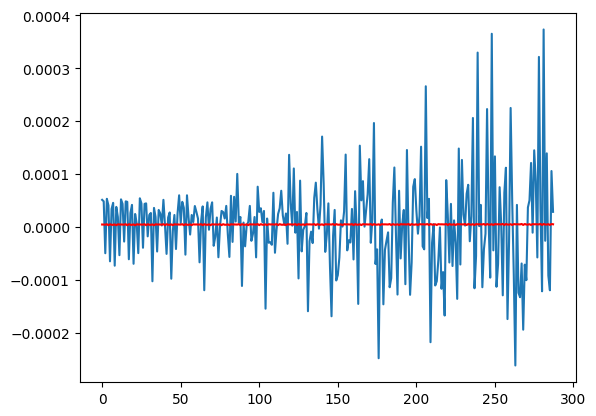

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x132b72a10>

In [292]:
plot(y_-y0_)
plot(y-y0,"r")

## Singular value decomposition (SVD)
Let $A$ be an $m\times n$ matrix. 

* Assuming that $m\geq n$.

The reduced singular value decomposition of $A$ is denoted as
$$A = U \Sigma V^\top.$$

$\Sigma$ is and $n\times n$ diagonal matrix, containing the 
singular values of $A$.

$$\Sigma = \begin{pmatrix} \sigma_1 \cr & \sigma_2 \cr &&\ddots \cr &&& \sigma_n \cr \end{pmatrix},$$
where $\sigma_1 \geq \sigma_2 \geq \cdots \geq \sigma_n \geq 0$.

$U \in \mathbb R^{m\times n}$ matrix with orthonormal columns.

$V \in \mathbb R^{n\times n}$ matrix with orthonormal columns: $V^\top V=I=VV^\top$. *$V$ is unitary.*

* Assuming that $m<n$


$U \in \mathbb R^{m\times m}$ matrix with orthonormal columns: $U^\top U=I=UU^\top$. *$U$ is unitary.*

$V \in \mathbb R^{m\times n}$ matrix with orthonormal columns.




In [14]:
 A = [1. 0. 0. 0. 2.; 
      0. 0. 3. 0. 0.; 
      0. 0. 0. 0. 0.; 
      0. 2. 0. 0. 0.]

println("Verify that USV' = A:")
U, S, V = svd(A)

U*diagm(S)*V'

Verify that USV' = A:


4×5 Array{Float64,2}:
 1.0  0.0  0.0  0.0  2.0
 0.0  0.0  3.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  2.0  0.0  0.0  0.0

### Using SVD to solve the least square problem

$$\min_x ||Ax-b||_2^2$$

* SVD is particularly useful when $A$ is rank-difficient.
* If the number of linearly independent columns of $A$ is smaller than the number of rows, $A$ is rank-difficient. In a least square problem, A has more rows than columns, and is a typical rank-difficient case.

#### Algorithm: 

1. Compute the SVD of $A$:   `U,S,V=svd(A)`
2. Make a decision on rank: choose $r$ so that $\sigma_r>tol>0$.
3. Truncate U,S,V accordingly: 
```
Vr=V[:,1:r]
Sr=S[1:r,1:r]
Ur=U[:,1:r]
```
4. `xr=Vr*(Sr\Ur'b)`
5. General solution is: `x=xr+V[:,r+1:n]*rand(m-r)`, where `m=size(A,1)`

`Ur'b` projects the data vector `b` to the column space of `Ur`.

Left multiplication of `Vr` transform the solution to coordinates using teh standard basis.


# Principal component analysis (PCA) and dimension reduction

* An important application of the Singular Value Decomposition.

* PCA is used as a preprocessing steps for certain machine learning applications.

Assuming that the columns of $A$ corresponds to the data points and each row of $A$ have zero average.
This way the  principal components correspond to the eigenvalue/eigenvectors of the covariance matrix: $AA^\top$.

$AA^\top x = US^2U^\top x = US^2(U^\top x)$

(Typically in data science, the data matrix is $A^\top$ in our discussion)

### Reduction of the dimension of data by projection onto a subset of signular vectors

Objectives: Keep a few directions (dimensions) in which the data have the largest variance. Ignore the dimensions in which the data is more or less constant.

Similar to the truncation in the previous excercises involving stablizing least square approximations,
one can truncate the last few singular values.

0. "Centering the data"
1. `U,S,V=svd(A)`
2. Truncation: 
```
Ur=U[:,1:r]
Sr=S[1:r,1:r]
```
3. Projection of the data vectors onto the truncated subspace: `Y=Ur'A`
4. Change back to the original coordinates: `Af=Ur*Y`

2×2 Array{Float64,2}:
 -0.713174  -0.700987
 -0.700987   0.713174

2-element Array{Float64,1}:
 23.3837 
  4.89087

80×2 Array{Float64,2}:
 -0.185567     -0.0235426 
 -0.0932554    -0.00778115
 -0.166326     -0.297977  
 -0.160997     -0.0996631 
 -0.178109      0.0406689 
 -0.14907      -0.0667124 
 -0.176169      0.265094  
 -0.128763     -0.029455  
 -0.159981     -0.0543919 
 -0.162165     -0.0493364 
 -0.161807     -0.0168546 
 -0.149208     -0.239077  
 -0.130688      0.164556  
  ⋮                       
  0.0250313     0.0164761 
  0.0603593    -0.0392587 
  0.0109195     0.0170029 
  0.0349341    -0.164569  
  0.0255703    -0.0311581 
  0.0491881    -0.0771716 
 -0.000908313  -0.160983  
  0.0102047    -0.123192  
  0.0148357     0.114992  
  0.0326755    -0.087626  
  0.0509278     0.0173434 
  0.0487088     0.0440463 

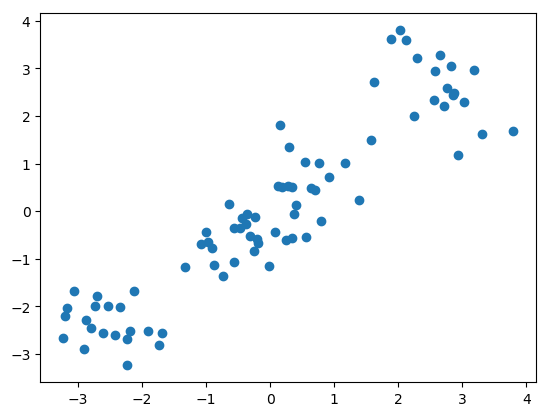

In [34]:
v1=[2.5 2.5]'
v2=[0.5 0.5]'

g1=v1.+0.5*randn(2, 20)
g2=-v1.+0.5*randn(2, 20)

g3=v2.+0.45*randn(2, 20)
g4=-v2.+0.45*randn(2, 20)

A=[g1 g2 g3 g4]

C=sum(A,2)./size(A,2)

Ac=A.-C

using PyPlot
scatter( Ac[1,:], Ac[2,:])

U,S,V=svd(Ac)

#display(C)
display(U)
display(S)
display(V)

In [19]:
Y=U'*Ac

2×80 Array{Float64,2}:
 -3.63056  -3.65038   -3.35191   …   0.327275   0.950424   0.62948 
 -0.54416  -0.393849  -0.110378     -0.155035  -0.517233  -0.971075

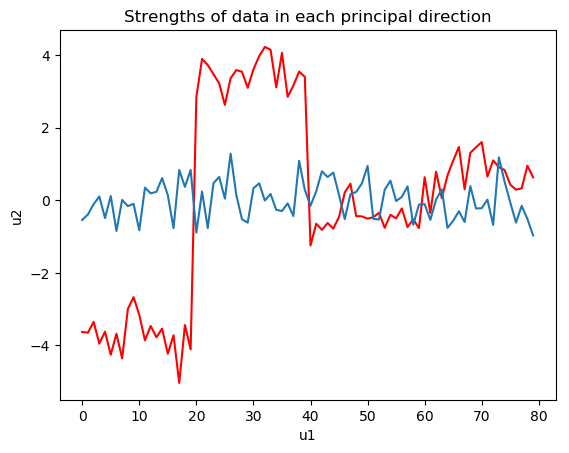

PyObject Text(24,0.5,u'u2')

In [20]:
plot(Y[1,:],"r")
plot(Y[2,:])

title("Strengths of data in each principal direction")
xlabel("u1")
ylabel("u2")

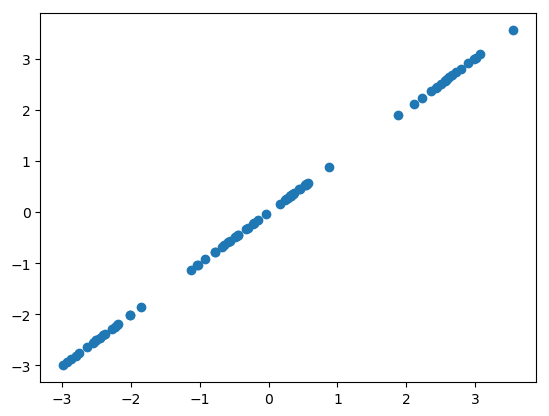

PyObject <matplotlib.collections.PathCollection object at 0x1412e6d10>

In [23]:
Y[2,:].=0.0

xp= U*Y

scatter(xp[1,:], xp[2,:])

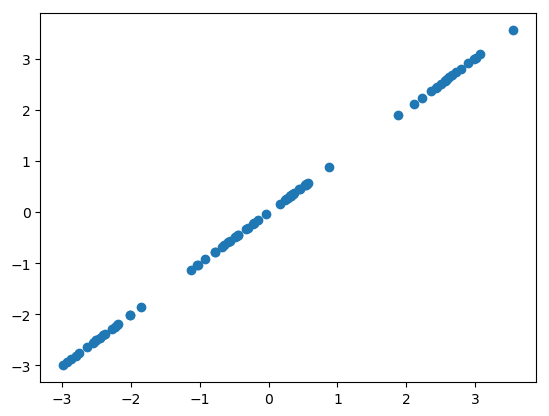

PyObject <matplotlib.collections.PathCollection object at 0x138dfd910>

In [33]:
Z=U[:,1]U[:,1]'*Ac

scatter( Z[1,:], Z[2,:])

# Sparsity promoting algorithms for least square fitting problems

Due to noise in the data, a sensible formulation of the problem is:
$$\min_{x\in \mathbb{R}^n} ||x||_1~~~s.t.~~~||Ax-b||_2<\epsilon.~~~~~~~(Bu)$$

One way to find a solution is to solve *a sequence of unconstrained problems*:
$$x^{k+1}\leftarrow\min_{x\in \mathbb{R}^n} ||x||_1 +\frac{\lambda}{2}||Ax-b^{k+1}||_2^2,~~~~~~~(Bk)$$
where $$b^{k+1} := b+(b^k-Ax^k).$$

Problem (Bk) can be in turn replaced by a linearized version (LBk) so that (LBk) can be solved by a simple analytical formula component-by-component, decoupled.

$$x^{k+1}\leftarrow\min_{x\in \mathbb{R}^n} \mu'||x||_1 +\frac{1}{2}||x-\left(x^k+A^\top(Ax^k - b^{k+1})\right)||_2^2+\frac{1}{2\delta}||x-x^k||_2^2 ,~~~~~~~(LBk)'$$

where 

$x^k-A^\top(Au^k - b^{k+1})$ is a lienar approximation of $\frac{1}{2}||Au-b^{k+1}||_2^2$ around $u^k$.

Equivalently, we have the linearized Bregman iterations defined as:

$$x^{k+1}\leftarrow\min_{x\in \mathbb{R}^n} \mu||x||_1 +\frac{1}{2}||x-\left(x^k-\delta A^\top(Au^k - b^{k+1})\right)||_2^2,~~~b^{k+1} := b+(b^k-Ax^k).~~~~(LBk)$$

(LBk) has an explicit solution component-by-component. See teh code below.

### The shrinkage formula


In [2]:
function shrink(f, μ)
   absf=abs(f)
    
   (absf> μ? f-μ*f/absf:0.0)
end

shrink (generic function with 1 method)

In [3]:
function linearized_Bregman_iterations(A, f, u; δ=0.01, μ=10.0, kmax=14)
    v=zeros(size(u))
    
    μδ=μ*δ
    
    for k in 1:kmax
        #compute vk
        v=v+δ*A'*(f-A*u)
        
        #apply shrinkage component by component
        for j in eachindex(u)
           u[j]=δ*shrink(v[j], μδ)
        end
    end
    
    display(u)
end

linearized_Bregman_iterationsv2 (generic function with 1 method)

In [12]:
A=rand(5,25)
f=rand(5)
u0=ones(25)
u=copy(u0)

linearized_Bregman_iterations(A,f, u0,δ=0.01,kmax=15000)

display(A*u0-f)

25-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.350467  
  0.0       
  0.0       
  0.0       
  0.0       
  0.246383  
 -0.359498  
  0.0       
  0.00961444
 -0.10298   
  0.0       
  0.0       
  0.0       
  0.0       
  0.534656  
  0.0       
  0.0       
  0.208761  
  0.0       

5-element Array{Float64,1}:
  7.32747e-15
 -1.44329e-15
 -3.34177e-14
  1.40998e-14
  2.19269e-14

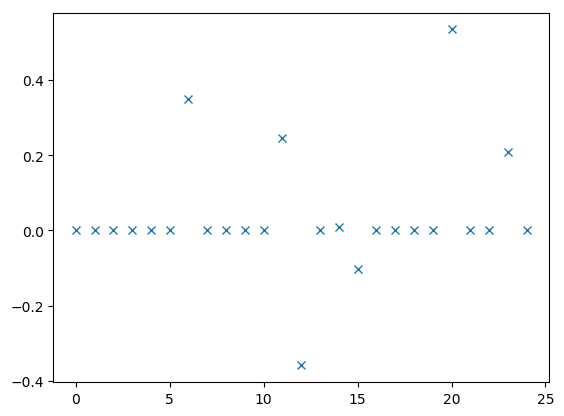

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12f4b9610>

In [13]:
using PyPlot

plot(u0,"x")

### Using SVD to solve under-dertermined systems

In [14]:
U,S,V=svd(A)

# Ax = USV'x = b
y=U'f #SV'x=U'b=:y
z=y./S #V'x=S\y
x=V*z

#verify the solution
display(A*x-f)

display(x)

5-element Array{Float64,1}:
  4.44089e-16
  3.33067e-16
 -2.22045e-16
 -5.55112e-17
  5.55112e-17

25-element Array{Float64,1}:
  0.0154101
  0.0414672
 -0.0523315
 -0.103508 
  0.153444 
 -0.0190207
  0.194119 
 -0.0179502
 -0.0347809
  0.0436796
  0.156676 
  0.135425 
 -0.212702 
  0.0295795
  0.112708 
 -0.148172 
 -0.142455 
  0.126139 
  0.105599 
  0.0151803
  0.332523 
  0.0453137
  0.0860937
  0.203467 
  0.0366871

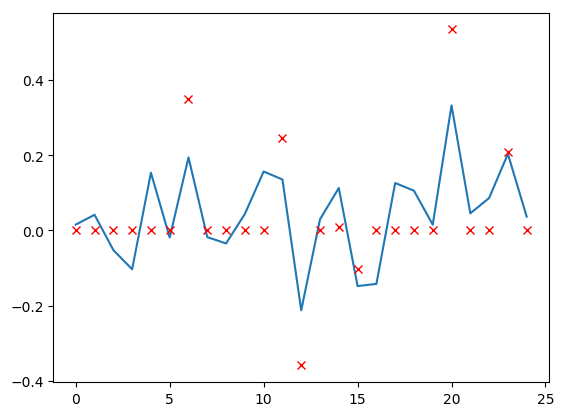

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x136ad7150>

In [17]:
using PyPlot

plot(x)
plot(u0,"rx")

In [18]:
println("SVD solution has 2-norm: ", norm(x))
println("l1 solution has 2-norm:", norm(u0))

SVD solution has 2-norm: 0.643792266407551
l1 solution has 2-norm:0.8080260187438496


In [19]:
norm(x,1)

2.564430965964316

In [20]:
norm(u0,1)

1.8123601048701816

In [21]:
length(find(u0))

7